# CSE291E-FA22

## Problem 1: Deform a shape

In this problem, we will practice part of what we learned in the image-to-3D lecture for shape deformation.

### 1. Laplacian
Given a mesh $M=(V, E, F)$, we assume that the adjacency matrix is $A\in\mathbb{R}^{n\times n}$, $D\in\mathbb{R}^{n\times n}$ is a diagonal matrix where $D[i,i]$ is the degree of the $i$-th vertex. The Laplacian matrix is defined as $L=D-A$.

Prove that:

(a) $\sum_{(i,j)\in E}\|x_i-x_j\|^2=x^T L x$ for $x\in \mathbb{R}^n$. [1pt]

(b) $L\in\mathbb{S}^n_{+} $, i.e., $L$ is a symmetric and positive semi-definite matrix. [1pt]

(c) For the data matrix $P\in\mathbb{R}^{n\times 3}$ where each row corresponds to a point in $\mathbb{R}^3$, denote the columns of $P$ as $P=[x, y, z]$ and rows of $P$ as $P=[p_1^T; p_2^T; \ldots; p_n^T]$, show that 
$\sum_{(i,j)\in E}\|p_i-p_j\|^2=x^T L x+ y^T L y + z^T L z$. (hint: Use the conclusion from 1(a)) [1pt]

## a)
Let us consider in the graph. Then $\sum_{i,j \in E}||x_i - x_j|^2$ will contain the term $x_i^2$ $D[i,i]$ times, $x_j^2$ $D[j,j]$ terms and the term $x_ix_j$ will apear once with weight $-A[i,j]$ and once with weight $-A[j,i]$ but since $A$ is symmetric, this will just occur with weight -2. So the portion of $\sum_{i,j \in E}||x_i - x_j|^2$ containing $x_i, x_j$ will be $D[i,i]x_i^2 + D[j,j]x_j^2 - 2A[i,j]x_ix_j$ which can be rearraged as $\begin{bmatrix}x_i && x_j\end{bmatrix}\begin{bmatrix} D[i,i] && -A[i,j] \\ -A[j,i] && D[j,j]\end{bmatrix} \begin{bmatrix} x_i \\ x_j\end{bmatrix}$. So if we consider all points $x_1, x_2, x_3, ...., x_n$, using the above pattern, we get $$\sum_{i,j \in E}||x_i - x_j||^2 = \begin{bmatrix}x_1 \\x_2 \\.\\.\\x_n\end{bmatrix}^T (D - A)\begin{bmatrix}x_1 \\x_2 \\.\\.\\x_n\end{bmatrix} = x^T L x$$ 

## b)
Consider the LHS of the above property, the LHS of the equation is always positive and 0 only if the graph is empty. Hence $\sum_{i,j \in E}||x_i - x_j||^2 \geq 0$. Hence now we have $x^T L x \geq 0$ and 0 only if $x = 0$. Hence $L \in \mathcal{S}_{+}^{n}$ i.e. $L$ is a positive-semidefinite matrix.

## c)
Let $p_i^T = \begin{bmatrix} x_i && y_i && z_i\end{bmatrix}$ and $P$ be the collection of all points i.e. $P = \begin{bmatrix}p_1^T \\ p_2^T \\.\\.\\p_n^T\end{bmatrix}$. Now $\sum_{i,j \in E} ||p_i - p_j||^2 = \sum_{i,j \in E}(||x_i - x_j||^2 + ||y_i - y_j||^2 + ||z_i - z_j||^2)= \sum_{i,j \in E}(|x_i - x_j||^2)+ \sum_{i,j \in E}(||y_i - y_j||^2)+ \sum_{i,j \in E}(||z_i - z_j||^2)$ $\newline \implies \sum_{i,j \in E} ||p_i - p_j||^2 = x^T L x + y^T L y + z^T L z$ using the part a result along each coordinate. 

### 2. Normalized Laplacian
Normalized Laplacian is defined as the normalized version of the Laplacian matrix above: $$L_{norm} = D^{-1} L$$

(a) Prove that the sum of each row of $L_{norm}$ is 0. [1pt]

## a)
Observe that $[A]_i$ is the connectivity of the $i^{th}$ vertex to all other vertices, so sum of all elements in the $i^{th}$ row of $A$ defines the total number of connections of the $i^{th}$ vertex which is the degree of the $i^{th}$ vertex and is equal to $D[i,i]$. Hence we have $D[i,i] = \sum_{j = 1}^{n}A_{ij}$, and since $D$ is a diagonal matrix, we can write $D[i,i] = \sum_{j = 1}^{n}D_{ij}$, hence we get $\sum_{j = 1}^{n}D_{ij} = \sum_{j = 1}^{n}A_{ij} \implies \sum_{j = 1}^{n} (D_{ij} - A_{ij}) = 0 \implies \sum_{j= 1}^{n} [D^{-1}L]_i = 0$ $\forall i$

(b) The difference between a vertex $x$ and the average position of its 1-ring neighborhood is a quantity that provides interesting geometric insight of the shape. It can be shown that, 
$$x-\frac{1}{|N(x)|}\sum_{y_i\in N(x)} y_i \approx H \vec n \Delta A$$
for a good mesh, where $N(x)$ is the 1-ring neighorhood vertices of $x$ by the mesh topology, $H=\frac{1}{2}(\kappa_{min}+\kappa_{\max})$ is the mean curvature at $x$ (in the sense of the underlying continuous surface being approximated), $\vec n$ is the surface normal vector at $x$, and $\Delta A$ is a quantity proportional to the total area of the 1-ring fan (triangles formed by $x$ and vertices along the 1-ring).

Define $\Delta p_i := p_i-\frac{1}{|N(p_i)|}\sum_{p_j\in N(p_i)} p_j$. Prove that $\Delta p_i = [L_{norm} P]_i$, where $P$ and $p_i$ are defined as in 1(c), and $[X]_i$ is to access the $i$-th row of $X$. [1pt]

## b)
Consider a graph $(V,E,F)$. Consider a vertex $p_i$. The 1-ring neighbourhood of $p_i$ is simply the edges origination from $p_i$. The adjacency matrix's $i^{th}$ row indicates which vertices are connected to $p_i$ and hence $|N(p_i)| = D[i,i]$ and $\sum_{p_j \in N(p_i)} p_j = [A]_i P = [AP]_i$ . Now also $D$ is a diagonal matrix, hence $\frac{1}{D[i,i]} [AP]_i = [D^{-1}AP]_i$. Now $p_i = [P]_i = [IP]_i = [D^{-1}DP]_i$. Therefore we can finally write $\Delta p_i := p_i-\frac{1}{|N(p_i)|}\sum_{p_j\in N(p_i)} p_j = [D^{-1}DP]_i - [D^{-1}AP]_i = [D^{-1}DP - D^{-1}AP]_i = [D^{-1}(D - A)P]_i = [D^{-1}LP]_i =[L_{norm}P]_i$

### 3. Shape Deformation (extra credit)
Please load the source.obj and target.obj files using the trimesh library of Python, and optimize to deform the vertices of the source.obj to match target.obj. Plot the source object, target object, and deformed object. [5pt]

In [16]:
import trimesh
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from chamfer import Chamfer_distance_torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

source = trimesh.load('source.obj')
target = trimesh.load('target.obj')

class Deform(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3,500)
        self.relu = nn.LeakyReLU()
        self.layer2 = nn.Linear(500,3)
        self.deform = nn.Sequential(self.layer1, self.relu, self.layer2)
    
    def forward(self, x):
#         print("Shape of x : {}",x.shape)
        return self.deform(x)

In [17]:
source_vertex = source.vertices

In [18]:
source_vertex[:5]

TrackedArray([[ 0.053243, -0.914796,  0.163862],
              [ 0.134695, -0.895671,  0.212918],
              [ 0.085689, -0.888288,  0.263719],
              [ 0.016182, -0.895671,  0.251425],
              [ 0.200159, -0.862085,  0.276346]])

In [44]:
source_tensor = torch.tensor(np.array(source_vertex)[None,:,:], requires_grad = True, dtype = torch.float32)
source_tensor.dim()

3

In [45]:
target_tensor = torch.tensor(np.array(target.vertices)[None,:,:], dtype = torch.float32)
target_tensor.shape

torch.Size([1, 1502, 3])

In [21]:
def train(model, source, target, loss_fn, optimizer):
    for i in tqdm(range(1000)):
        model.train()
        pred = model(source)
        gt = target
        optimizer.zero_grad()
        dist1, idx1, dist2, idx2 = loss_fn(pred, gt)
#         print(dist1.shape, dist2.shape)
        loss = torch.mean(dist1) + torch.mean(dist2)
        loss.backward()
        optimizer.step()
        
        if i % 20 == 0:
            print(f"epoch : {i + 1} || loss : {loss.item()}")

model = Deform()
optimizer = Adam(model.parameters(), lr = 1e-4)
loss_fn = Chamfer_distance_torch

train(model, source_tensor, target_tensor, loss_fn, optimizer)
                  

  0%|▋                                                                                                                                                                     | 4/1000 [00:00<00:53, 18.74it/s]

epoch : 1 || loss : 0.35796821117401123


  3%|████▎                                                                                                                                                                | 26/1000 [00:00<00:34, 28.51it/s]

epoch : 21 || loss : 0.0804271548986435


  4%|███████▎                                                                                                                                                             | 44/1000 [00:01<00:34, 27.99it/s]

epoch : 41 || loss : 0.02789979800581932


  6%|██████████▋                                                                                                                                                          | 65/1000 [00:02<00:33, 28.18it/s]

epoch : 61 || loss : 0.013415565714240074


  9%|██████████████▏                                                                                                                                                      | 86/1000 [00:03<00:33, 27.42it/s]

epoch : 81 || loss : 0.006447378545999527


 10%|█████████████████▏                                                                                                                                                  | 105/1000 [00:03<00:31, 28.79it/s]

epoch : 101 || loss : 0.003294429276138544


 13%|████████████████████▋                                                                                                                                               | 126/1000 [00:04<00:30, 28.35it/s]

epoch : 121 || loss : 0.0018553424160927534


 14%|███████████████████████▌                                                                                                                                            | 144/1000 [00:05<00:31, 27.16it/s]

epoch : 141 || loss : 0.0012520853197202086


 16%|███████████████████████████                                                                                                                                         | 165/1000 [00:06<00:30, 27.79it/s]

epoch : 161 || loss : 0.001016163732856512


 18%|██████████████████████████████▎                                                                                                                                     | 185/1000 [00:06<00:27, 29.45it/s]

epoch : 181 || loss : 0.0009180069901049137


 20%|█████████████████████████████████▍                                                                                                                                  | 204/1000 [00:07<00:27, 28.92it/s]

epoch : 201 || loss : 0.0008677855948917568


 23%|█████████████████████████████████████                                                                                                                               | 226/1000 [00:08<00:25, 29.87it/s]

epoch : 221 || loss : 0.0008368895505554974


 24%|████████████████████████████████████████▏                                                                                                                           | 245/1000 [00:08<00:24, 31.06it/s]

epoch : 241 || loss : 0.0008120453567244112


 26%|███████████████████████████████████████████▍                                                                                                                        | 265/1000 [00:09<00:25, 29.27it/s]

epoch : 261 || loss : 0.000790376216173172


 28%|██████████████████████████████████████████████▌                                                                                                                     | 284/1000 [00:10<00:23, 30.47it/s]

epoch : 281 || loss : 0.0007705600000917912


 30%|█████████████████████████████████████████████████▊                                                                                                                  | 304/1000 [00:10<00:22, 31.45it/s]

epoch : 301 || loss : 0.0007523444946855307


 32%|█████████████████████████████████████████████████████▏                                                                                                              | 324/1000 [00:11<00:22, 30.69it/s]

epoch : 321 || loss : 0.0007348917424678802


 34%|████████████████████████████████████████████████████████▍                                                                                                           | 344/1000 [00:11<00:21, 30.77it/s]

epoch : 341 || loss : 0.0007181871333159506


 36%|███████████████████████████████████████████████████████████▊                                                                                                        | 365/1000 [00:12<00:21, 29.22it/s]

epoch : 361 || loss : 0.0007018588948994875


 38%|██████████████████████████████████████████████████████████████▉                                                                                                     | 384/1000 [00:13<00:21, 28.48it/s]

epoch : 381 || loss : 0.0006855248939245939


 40%|██████████████████████████████████████████████████████████████████▍                                                                                                 | 405/1000 [00:14<00:19, 30.76it/s]

epoch : 401 || loss : 0.0006700594094581902


 42%|█████████████████████████████████████████████████████████████████████▋                                                                                              | 425/1000 [00:14<00:18, 30.92it/s]

epoch : 421 || loss : 0.0006555307190865278


 44%|████████████████████████████████████████████████████████████████████████▉                                                                                           | 445/1000 [00:15<00:17, 31.40it/s]

epoch : 441 || loss : 0.0006417023250833154


 46%|████████████████████████████████████████████████████████████████████████████▎                                                                                       | 465/1000 [00:15<00:16, 32.46it/s]

epoch : 461 || loss : 0.0006288614240474999


 49%|███████████████████████████████████████████████████████████████████████████████▋                                                                                    | 486/1000 [00:16<00:17, 29.05it/s]

epoch : 481 || loss : 0.0006161017809063196


 50%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 504/1000 [00:17<00:17, 28.57it/s]

epoch : 501 || loss : 0.0006031555822119117


 53%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 527/1000 [00:18<00:15, 31.34it/s]

epoch : 521 || loss : 0.0005911521147936583


 55%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 547/1000 [00:18<00:14, 30.74it/s]

epoch : 541 || loss : 0.0005798235069960356


 57%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 567/1000 [00:19<00:13, 31.43it/s]

epoch : 561 || loss : 0.0005689048557542264


 59%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 587/1000 [00:19<00:13, 31.59it/s]

epoch : 581 || loss : 0.0005581441801041365


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 607/1000 [00:20<00:12, 31.46it/s]

epoch : 601 || loss : 0.0005478780367411673


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 627/1000 [00:21<00:12, 30.80it/s]

epoch : 621 || loss : 0.0005378394853323698


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 647/1000 [00:21<00:11, 31.70it/s]

epoch : 641 || loss : 0.0005279713659547269


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 667/1000 [00:22<00:10, 31.51it/s]

epoch : 661 || loss : 0.0005188561626709998


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 687/1000 [00:23<00:10, 30.26it/s]

epoch : 681 || loss : 0.0005103221046738327


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 707/1000 [00:23<00:09, 31.31it/s]

epoch : 701 || loss : 0.0005019505624659359


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 727/1000 [00:24<00:08, 31.52it/s]

epoch : 721 || loss : 0.0004939892678521574


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 747/1000 [00:25<00:08, 31.06it/s]

epoch : 741 || loss : 0.00048614462139084935


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 767/1000 [00:25<00:07, 31.99it/s]

epoch : 761 || loss : 0.00047856237506493926


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 787/1000 [00:26<00:06, 31.06it/s]

epoch : 781 || loss : 0.00047135938075371087


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 807/1000 [00:27<00:06, 30.86it/s]

epoch : 801 || loss : 0.00046447262866422534


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 827/1000 [00:27<00:05, 30.61it/s]

epoch : 821 || loss : 0.00045760226203128695


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 843/1000 [00:28<00:05, 31.13it/s]

epoch : 841 || loss : 0.00045084021985530853


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 865/1000 [00:28<00:04, 30.38it/s]

epoch : 861 || loss : 0.0004443859215825796


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 885/1000 [00:29<00:03, 31.96it/s]

epoch : 881 || loss : 0.0004381481558084488


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 905/1000 [00:30<00:03, 31.00it/s]

epoch : 901 || loss : 0.0004316865815781057


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 925/1000 [00:30<00:02, 30.76it/s]

epoch : 921 || loss : 0.0004256119718775153


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 945/1000 [00:31<00:01, 29.49it/s]

epoch : 941 || loss : 0.00041951966704800725


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 966/1000 [00:32<00:01, 28.86it/s]

epoch : 961 || loss : 0.00041354860877618194


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 986/1000 [00:32<00:00, 29.75it/s]

epoch : 981 || loss : 0.0004077438497915864


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.87it/s]


In [22]:
deform = model(source_tensor)

In [23]:
deform = np.array(deform.detach())

In [24]:
deform.shape

(1, 962, 3)

In [25]:
target.vertices

TrackedArray([[ 0.086368,  0.015956, -0.508997],
              [ 0.079205,  0.032873, -0.516604],
              [ 0.074298,  0.033267, -0.499714],
              ...,
              [ 0.165407,  0.479595, -0.011311],
              [ 0.194457,  0.44322 , -0.070495],
              [ 0.197567,  0.461657, -0.086891]])

In [80]:
def plot_mesh(mesh,color, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(mesh.vertices[:, 0], mesh.vertices[:,1], triangles=mesh.faces, Z=mesh.vertices[:,2], cmap=plt.cm.rainbow, color=color) 
    plt.title(title)
    plt.show()

In [70]:
import open3d

In [71]:
np.array(target.vertices).shape

(1502, 3)

In [72]:
deform.reshape(-1,3).shape

(962, 3)

In [73]:
source = trimesh.load('source.obj')

In [74]:
source

<trimesh.Trimesh(vertices.shape=(962, 3), faces.shape=(1920, 3))>

In [75]:
from matplotlib.cm import get_cmap
NUM_OBJECTS = 79
cmap = get_cmap('rainbow', NUM_OBJECTS)
COLOR_PALETTE = np.array([cmap(i)[:3] for i in range(NUM_OBJECTS + 3)])
COLOR_PALETTE = np.array(COLOR_PALETTE * 255, dtype=np.uint8)
COLOR_PALETTE[-3] = [119, 135, 150]
COLOR_PALETTE[-2] = [176, 194, 216]
COLOR_PALETTE[-1] = [255, 255, 225]

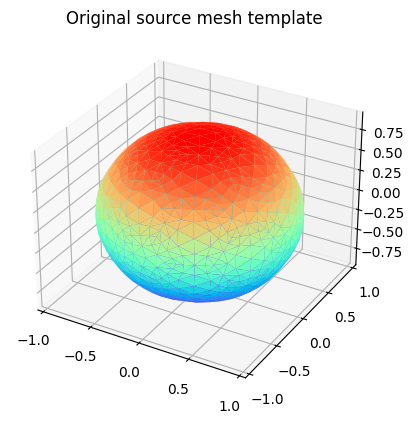

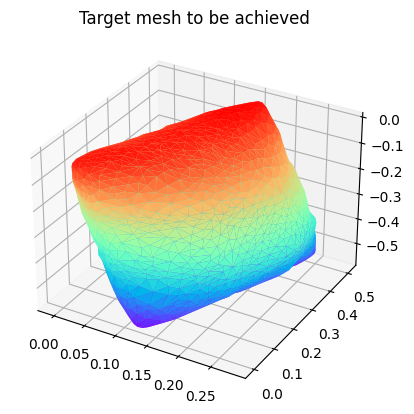

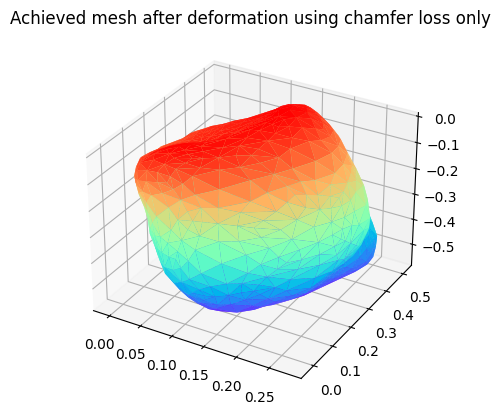

In [81]:
plot_mesh(source, COLOR_PALETTE[0]/255, 'Original source mesh template')
plot_mesh(target, COLOR_PALETTE[1]/255, 'Target mesh to be achieved')
# deform_mesh = trimesh.Trimesh(vertices=deform, faces = source.faces)
deformed = trimesh.Trimesh(vertices = deform[:,:,:3].reshape(-1,3), faces = source.faces)
plot_mesh(deformed,COLOR_PALETTE[2]/255, 'Achieved mesh after deformation using chamfer loss only')

*Your solution*

(b) Curvature and normal-based loss

*Your solution*

## Problem 2: ICP

In [17]:
"""Visualization utilies."""

# You can use other visualization from previous homeworks, like Open3D
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import copy

def show_points(points):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,projection = '3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points[:, 0], points[:, 2], points[:, 1])
    

def compare_points(points1, points2):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,projection = '3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points1[:, 0], points1[:, 2], points1[:, 1])
    ax.scatter(points2[:, 0], points2[:, 2], points2[:, 1])

In [4]:
"""Load data."""

import trimesh
import numpy as np

source_pcd = trimesh.load("banana.source.ply").vertices
target_pcd = trimesh.load("banana.target.ply").vertices
gt_T = np.loadtxt("banana.pose.txt")

In [5]:
source_pcd

TrackedArray([[-0.23091938, -0.10104883, -0.07753404],
              [ 0.27073169, -0.00146855, -0.0353344 ],
              [-0.39152163, -0.00135914, -0.07481582],
              ...,
              [-0.29234454, -0.14529917, -0.09030698],
              [ 0.19018735, -0.19979134, -0.05973255],
              [-0.09481647, -0.07675853, -0.01570301]])

In [6]:
target_pcd

TrackedArray([[1.07478809, 1.47837925, 0.68953747],
              [1.1249311 , 1.503407  , 0.17942953],
              [1.0583688 , 1.60131693, 0.83220923],
              ...,
              [1.0651176 , 1.44293368, 0.7569496 ],
              [1.12221241, 1.31854594, 0.29003513],
              [1.13867629, 1.48905003, 0.55263776]])

In [7]:
from sklearn.neighbors import NearestNeighbors

def nearest_neighbor(src, dst):
    '''
    Find the nearest (Euclidean) neighbor in dst for each point in src
    Input:
        src: Nxm array of points
        dst: Nxm array of points
    Output:
        distances: Euclidean distances of the nearest neighbor
        indices: dst indices of the nearest neighbor
    '''

    assert src.shape == dst.shape

    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(dst)
    distances, indices = neigh.kneighbors(src, return_distance=True)
#     print("indices from sklearn : {}".format(indices))
    return indices.ravel()

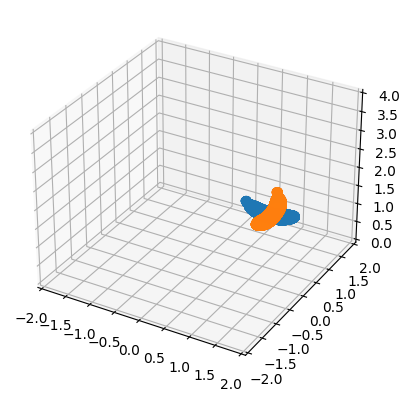

In [137]:
source = np.copy(source_pcd) + np.mean(target_pcd, axis = 0) - np.mean(source_pcd, axis = 0)
target = np.copy(target_pcd)
compare_points(source, target)

In [138]:
"""Implement your own ICP."""

def icp(source_pcd, target_pcd):
    """Iterative closest point.
    
    Args:
        source_pcd (np.ndarray): [N1, 3]
        target_pcd (np.ndarray): [N2, 3]
    
    Returns:
        np.ndarray: [4, 4] rigid transformation to align source to target.
    """
    T = np.eye(4)
    target_mean = np.mean(target_pcd, axis = 0)
    R = T[:3, :3]
    T[:3,3] = target_mean[:] - np.mean(source_pcd, axis = 0)
    source = np.copy(source_pcd) + target_mean - np.mean(source_pcd, axis = 0)
    target = np.copy(target_pcd)
    
    # Implement your own algorithm here.
    for it in tqdm(range(50)):
        corr_idx = nearest_neighbor(source, target)
        p = source.T
        q = target_pcd[corr_idx, :].T
        M = (q - np.mean(q,axis = 1, keepdims=True))@ (p - np.mean(p, axis = 1, keepdims=True)).T
        U,S,V = np.linalg.svd(M)
        R = U@V
        if np.linalg.det(R) < 0:
            V[:,-1] = -V[:,-1]
        R = U@V
        t = np.mean(q,axis = 1, keepdims=True) - R@np.mean(p,axis = 1, keepdims=True)
#         print(f"relative translation : {t}")
        source_new = (R@p + t).T
        source = source_new
        T_temp = np.block([[R,t], [np.zeros((1,3)), 1]])
        T = T_temp @ T
        rot_error = np.rad2deg(compute_rre(T[:3, :3], gt_T[:3, :3]))
        rte = compute_rte(T[:3, 3], gt_T[:3, 3])
        print(f"rot error : {rot_error} || translation error : {rte}")
    return T

  4%|█▊                                          | 2/50 [00:00<00:03, 13.19it/s]

rot error : 86.9389656369664 || translation error : 0.06805395849299617
rot error : 81.75630675910436 || translation error : 0.07271131712948033
rot error : 66.68250314519055 || translation error : 0.07132642738497441


 12%|█████▎                                      | 6/50 [00:00<00:03, 14.17it/s]

rot error : 37.83088208887614 || translation error : 0.06730364391722787
rot error : 19.15749343913435 || translation error : 0.05435682431670539
rot error : 12.192294583035894 || translation error : 0.041270809782583136
rot error : 8.502858371087228 || translation error : 0.030706188300612954


 22%|█████████▍                                 | 11/50 [00:00<00:02, 19.10it/s]

rot error : 6.144945107571997 || translation error : 0.022948807405673392
rot error : 4.603721323573633 || translation error : 0.017597647737449172
rot error : 3.601915811625485 || translation error : 0.01411664220014118
rot error : 2.926201185042271 || translation error : 0.011923650600620181
rot error : 2.4556035790776765 || translation error : 0.010546637888584977
rot error : 2.087853515398311 || translation error : 0.009634729553363301


 38%|████████████████▎                          | 19/50 [00:00<00:01, 26.26it/s]

rot error : 1.8040245479665649 || translation error : 0.008962465217761758
rot error : 1.5624026077999607 || translation error : 0.008417617450711004
rot error : 1.3582308483377696 || translation error : 0.00795194333044214
rot error : 1.197291747633845 || translation error : 0.007562006552250469
rot error : 1.0703514222654023 || translation error : 0.007223724460592022
rot error : 0.9724970879253186 || translation error : 0.006911819587216404
rot error : 0.8944459312073222 || translation error : 0.006603292087126549


 54%|███████████████████████▏                   | 27/50 [00:01<00:00, 29.79it/s]

rot error : 0.82957449358498 || translation error : 0.006324198855981207
rot error : 0.7730870919130947 || translation error : 0.006062577240403191
rot error : 0.7232375279934821 || translation error : 0.00581022359959737
rot error : 0.6794266686736165 || translation error : 0.005556780191458625
rot error : 0.6386900793785545 || translation error : 0.0053000231284767805
rot error : 0.6022671549025616 || translation error : 0.005037167007824063
rot error : 0.5680862289699448 || translation error : 0.004751109659483922


 68%|█████████████████████████████▏             | 34/50 [00:01<00:00, 30.47it/s]

rot error : 0.5334276490730013 || translation error : 0.004457785228096964
rot error : 0.4974802049341708 || translation error : 0.004124112375002523
rot error : 0.4549059484657815 || translation error : 0.0037319325573458855
rot error : 0.40253700264621073 || translation error : 0.0032507857036372855
rot error : 0.32783487706955144 || translation error : 0.0025978771697115887
rot error : 0.22194712252748913 || translation error : 0.0017044469292163457
rot error : 0.09189078018094955 || translation error : 0.0006621359364264844


 84%|████████████████████████████████████       | 42/50 [00:01<00:00, 33.77it/s]

rot error : 0.007129130602820963 || translation error : 4.858286288210888e-05
rot error : 6.3890569402603996e-06 || translation error : 4.503890859503922e-08
rot error : 0.0 || translation error : 4.069790255192151e-10
rot error : 0.0 || translation error : 4.0697916949491695e-10
rot error : 0.0 || translation error : 4.069787321199127e-10
rot error : 0.0 || translation error : 4.069792089503863e-10
rot error : 0.0 || translation error : 4.069789522071813e-10
rot error : 0.0 || translation error : 4.0697895360695704e-10


100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 27.67it/s]

rot error : 0.0 || translation error : 4.0697881243084497e-10
rot error : 0.0 || translation error : 4.069790311183021e-10
rot error : 0.0 || translation error : 4.069789944622533e-10
rot error : 0.0 || translation error : 4.069789944622533e-10
rot error : 0.0 || translation error : 4.069789958620517e-10
rot error : 0.0 || translation error : 4.0697874051864017e-10
rot error : 0.0 || translation error : 4.069790353176969e-10
rot error : 0.0 || translation error : 4.069788180300561e-10
[[ 0.04139069 -0.12505187  0.99128646  1.14856815]
 [-0.15543338  0.9792519   0.13002374  1.55152014]
 [-0.98697886 -0.15946078  0.02109467  0.44714717]
 [ 0.          0.          0.          1.        ]]
rre=0.0, rte=4.069788180300561e-10


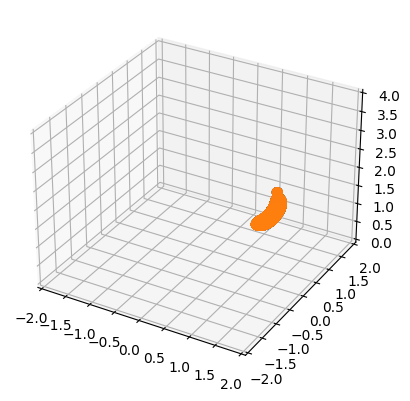

In [139]:
"""Metric and visualization."""

def compute_rre(R_est: np.ndarray, R_gt: np.ndarray):
    """Compute the relative rotation error (geodesic distance of rotation)."""
    assert R_est.shape == (3, 3), 'R_est: expected shape (3, 3), received shape {}.'.format(R_est.shape)
    assert R_gt.shape == (3, 3), 'R_gt: expected shape (3, 3), received shape {}.'.format(R_gt.shape)
    # relative rotation error (RRE)
    rre = np.arccos(np.clip(0.5 * (np.trace(R_est.T @ R_gt) - 1), -1.0, 1.0))
    return rre


def compute_rte(t_est: np.ndarray, t_gt: np.ndarray):
    assert t_est.shape == (3,), 't_est: expected shape (3,), received shape {}.'.format(t_est.shape)
    assert t_gt.shape == (3,), 't_gt: expected shape (3,), received shape {}.'.format(t_gt.shape)
    # relative translation error (RTE)
    rte = np.linalg.norm(t_est - t_gt)
    return rte


# Visualization
T = icp(source_pcd, target_pcd)
print(T)
rre = np.rad2deg(compute_rre(T[:3, :3], gt_T[:3, :3]))
rte = compute_rte(T[:3, 3], gt_T[:3, 3])
print(f"rre={rre}, rte={rte}")
compare_points(source_pcd @ T[:3, :3].T + T[:3, 3], target_pcd)

## Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pickle
import utils
import open3d
import json
def load_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
def get_split_files(split_name):
    with open(os.path.join(split_dir, f"{split_name}.txt"), 'r') as f:
        prefix = [os.path.join(training_data_dir, line.strip()) for line in f if line.strip()]
        rgb = [p + "_color_kinect.png" for p in prefix]
        depth = [p + "_depth_kinect.png" for p in prefix]
        label = [p + "_label_kinect.png" for p in prefix]
        meta = [p + "_meta.pkl" for p in prefix]
    return rgb, depth, label, meta

In [3]:
training_data_dir = "./training_data_filtered/training_data/v2.2/"
split_dir = "./training_data_filtered/training_data/splits/v2/"

In [4]:
rgb_files_train, depth_files_train, label_files_train, meta_files_train = get_split_files('train')

In [5]:
meta_train = {}
for i in range(len(rgb_files_train)):
    meta = load_pickle(meta_files_train[i])
    meta_train.update({i : meta})

In [6]:
training_poses = {}
for i in range(len(meta_train)):
    objects = meta_train[i]['object_ids']
    for obj in objects:
        if obj not in training_poses:
            training_poses[obj] = [meta_train[i]['poses_world'][obj]]
        else:
            training_poses[obj].append(meta_train[i]['poses_world'][obj])

In [7]:
from matplotlib.cm import get_cmap
NUM_OBJECTS = 79
cmap = get_cmap('rainbow', NUM_OBJECTS)
COLOR_PALETTE = np.array([cmap(i)[:3] for i in range(NUM_OBJECTS + 3)])
COLOR_PALETTE = np.array(COLOR_PALETTE * 255, dtype=np.uint8)
COLOR_PALETTE[-3] = [119, 135, 150]
COLOR_PALETTE[-2] = [176, 194, 216]
COLOR_PALETTE[-1] = [255, 255, 225]

## First we create the point cloud for each scene , then we need to visit each point cloud, get the partial point cloud of each object instance in that image from the image segmentation id and save it. What we will do is we will transfer the point cloud to the camera frame so that the pose of the point cloud is R = I, (0,0,0). Later we will take a union of all point clouds for a given id at this pose. And this will give us the shape of that particular object and this will act as our source point cloud for performing ICP on the test set, which will align the source to target and give us the pose of the test point cloud in the camera frame, and we can then multiply that with the camera extrinsic to get the pose of the object in canonical frame. 

In [22]:
def preprocess(rgb_files, depth_files, label_files, meta_files,n = 1, test = False):
    N = len(rgb_files)//1
    meta_dict = {}
    for i in range(N):
        meta = load_pickle(meta_files[i])
        meta_dict.update({i : meta})

    K_cam = meta_dict[0]['intrinsic']
    point_clouds = {}
    for it in tqdm(range(N)):
        '''
        '''
        z = np.array(Image.open(depth_files[it]))/1000
        v,u = np.indices(z.shape)
        K_cam = meta_dict[0]['intrinsic']
        pixels = np.stack([u,v,np.ones_like(z)], axis = -1)
        pc_cam = pixels * z[:,:,None] @ np.linalg.inv(K_cam).T
        inv_extrinsic = np.linalg.inv(meta_dict[it]['extrinsic'])
        pc_world = pc_cam @ inv_extrinsic[:3, :3].T + inv_extrinsic[:3,3]
        
        objects = meta_dict[it]['object_ids']
        for obj in objects:
            label = np.array(Image.open(label_files[it]))
            pos = np.where(label == obj)
            if not test:
                T_obj = meta_dict[it]['poses_world'][obj]
                T = np.linalg.inv(T_obj)
                R = T[:3, :3]
                t = T[:3,3]
                points = pc_world[pos[0], pos[1],:] @ R.T + t
            else:
                points = pc_world[pos[0], pos[1], :]
            if obj not in point_clouds:
                point_clouds[obj] = [points]
            else:
                point_clouds[obj].append(points)
    return point_clouds

In [23]:
training_data_dir = "./training_data_filtered/training_data/v2.2/"
split_dir = "./training_data_filtered/training_data/splits/v2/"
rgb_files_train, depth_files_train, label_files_train, meta_files_train = get_split_files('train')

In [24]:
# point_clouds_train = preprocess(rgb_files_train, depth_files_train, label_files_train, meta_files_train)

In [94]:
with open('point_clouds_train.pkl', 'wb') as f:
    pickle.dump([point_clouds_train,training_poses], f)

In [20]:
with open('point_clouds_train.pkl', 'rb') as f:
    point_clouds_train, training_poses = pickle.load(f)

In [26]:
len(point_clouds_train[35])

1777

In [28]:
points = open3d.utility.Vector3dVector(np.array(point_clouds_train[14][0]).reshape([-1, 3]))
pcd = open3d.geometry.PointCloud()
pcd.points = points
open3d.visualization.draw_geometries([pcd]) 

## Validation

In [78]:
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    open3d.visualization.draw_geometries([source_temp, target_temp])


In [79]:
def get_pcl(points):
    points = open3d.utility.Vector3dVector(np.array(points).reshape([-1, 3]))
    pcd = open3d.geometry.PointCloud()
    pcd.points = points
    return pcd

In [80]:
training_data_dir = "./training_data_filtered/training_data/v2.2/"
split_dir = "./training_data_filtered/training_data/splits/v2/"
rgb_files_val, depth_files_val, label_files_val, meta_files_val = get_split_files('val')

In [81]:
with open(os.path.join(split_dir, "val.txt"), 'r') as f:
        prefix_val = [line.strip() for line in f if line.strip()]
        

In [82]:
meta_val = {}
for i in range(len(rgb_files_val)):
    meta = load_pickle(meta_files_val[i])
    meta_val.update({i : meta})

In [110]:
transformations = {}
Fitness = {}
for it in tqdm(range(len(rgb_files_val)//5)):
# for it in tqdm(range(10)):
    '''
    for each object in a validation image, extract point cloud of that object and get it to world frame (not canonical)
    get corresponding point cloud from train data
    run icp on train point cloud and validation point cloud
    '''
    z = np.array(Image.open(depth_files_val[it]))/1000
    v,u = np.indices(z.shape)
    K_cam = meta_val[it]['intrinsic']
    pixels = np.stack([u,v,np.ones_like(z)], axis = -1)
    pc_cam = pixels * z[:,:,None] @ np.linalg.inv(K_cam).T
    inv_extrinsic = np.linalg.inv(meta_val[it]['extrinsic'])
    pc_world = pc_cam @ inv_extrinsic[:3, :3].T + inv_extrinsic[:3,3]
    key = prefix_val[it]
    transformations.update({key : {'poses_world' : [None] * 79}})
    Fitness.update({key : {'fitness' : [None] * 79}})
    objects = meta_val[it]['object_ids']
    
    for obj in objects:
        label = np.array(Image.open(label_files_val[it]))
        pos = np.where(label == obj)
        target = get_pcl(pc_world[pos[0], pos[1], :][::4,:])
        poses = []
        fitness = []
        for i,pc in (enumerate(point_clouds_train[obj])):
            source = get_pcl(pc[::2,:])
            
            trans = training_poses[obj][i]
            trans_init = trans
            try:
                reg_p2p = open3d.pipelines.registration.registration_icp(source, target,0.008, trans_init,\
                                            open3d.pipelines.registration.TransformationEstimationPointToPoint(), \
                                            open3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=200))
                fitness.append(reg_p2p.fitness)
                poses.append(reg_p2p.transformation.tolist())
            except Exception as e:
#                 print(e)
                fitness.append(0)
                poses.append(np.eye(4).tolist())
                continue
        fitness = np.array(fitness)
#         draw_registration_result(source, target, poses[np.argmax(fitness)])
        transformations[key]['poses_world'][obj] = poses[np.argmax(fitness)]
#             print("max fitness : {}".format(fitness[np.argmax(fitness)]))

  9%|███▋                                        | 4/47 [02:11<23:30, 32.80s/it]


KeyboardInterrupt: 

In [ ]:
fitness

In [ ]:
transformations.keys()

In [109]:
with open('pred_val.json', 'w') as f:
    json.dump(transformations, f)

In [38]:
with open('val_gt_47.json','r') as f:
    val_gt = json.load(f)

In [39]:
val_gt.keys()

dict_keys(['1-1-4', '1-1-15', '1-1-16', '1-2-18', '1-3-1', '1-3-3', '1-3-11', '1-4-10', '1-4-17', '1-5-11', '1-5-19', '1-6-2', '1-6-5', '1-6-13', '1-7-6', '1-7-7', '1-8-1', '1-9-4', '1-9-9', '1-12-2', '1-13-7', '1-13-11', '1-13-19', '1-14-7', '1-14-12', '1-15-15', '1-18-12', '1-19-1', '1-19-18', '1-20-2', '1-20-8', '1-21-5', '1-21-8', '1-22-7', '1-22-20', '1-23-6', '1-24-8', '1-26-17', '1-27-6', '1-27-10', '1-29-2', '1-29-11', '1-30-2', '1-30-6', '1-31-0', '1-32-1', '1-32-5'])

## Testing

In [8]:
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    open3d.visualization.draw_geometries([source_temp, target_temp])


In [9]:
def get_pcl(points):
    points = open3d.utility.Vector3dVector(np.array(points).reshape([-1, 3]))
    pcd = open3d.geometry.PointCloud()
    pcd.points = points
    return pcd

In [10]:
test_data_dir = "./testing_data_pose_filtered/testing_data/v2.2/"
split_dir = "./testing_data_pose_filtered/testing_data/"
def get_test_files(split_name):
    with open(os.path.join(split_dir, f"{split_name}.txt"), 'r') as f:
        prefix = [os.path.join(test_data_dir, line.strip()) for line in f if line.strip()]
        rgb = [p + "_color_kinect.png" for p in prefix]
        depth = [p + "_depth_kinect.png" for p in prefix]
        label = [p + "_label_kinect.png" for p in prefix]
        meta = [p + "_meta.pkl" for p in prefix]
    return rgb, depth, label, meta

In [11]:
with open(os.path.join(split_dir, "test.txt"), 'r') as f:
        prefix = [line.strip() for line in f if line.strip()]

In [12]:
prefix_test = prefix

In [13]:
rgb_files_test, depth_files_test, label_files_test, meta_files_test = get_test_files('test')

In [14]:
meta_test = {}
for i in range(len(rgb_files_test)):
    meta = load_pickle(meta_files_test[i])
    meta_test.update({i : meta})

In [25]:
def test(downsample = 64, threshold = 0.02):
    transformations = {}
    Fitness = {}
    for it in tqdm(range(len(rgb_files_test))):
        '''
        for each object in a test image, extract point cloud of that object and get it to world frame (not canonical)
        get corresponding point cloud from train data
        run icp on train point cloud and test point cloud
        '''
        z = np.array(Image.open(depth_files_test[it]))/1000
        v,u = np.indices(z.shape)
        K_cam = meta_test[it]['intrinsic']
        pixels = np.stack([u,v,np.ones_like(z)], axis = -1)
        pc_cam = pixels * z[:,:,None] @ np.linalg.inv(K_cam).T
        inv_extrinsic = np.linalg.inv(meta_test[it]['extrinsic'])
        pc_world = pc_cam @ inv_extrinsic[:3, :3].T + inv_extrinsic[:3,3]
        key = prefix_test[it]
        transformations.update({key : {'poses_world' : [None] * 79}})
        Fitness.update({key : {'fitness' : [None] * 79}})
        objects = meta_test[it]['object_ids']

        for obj in objects:
            label = np.array(Image.open(label_files_test[it]))
            pos = np.where(label == obj)
            target = get_pcl(pc_world[pos[0], pos[1], :][::4,:])
            poses = []
            fitness = []
            for i,pc in (enumerate(point_clouds_train[obj])):
                source = get_pcl(pc[::downsample,:])

                trans = training_poses[obj][i]
                trans_init = trans
                try:
                    reg_p2p = open3d.pipelines.registration.registration_icp(source, target,threshold, trans_init,\
                                              open3d.pipelines.registration.TransformationEstimationPointToPoint(), \
                                              open3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=100))
                    fitness.append(reg_p2p.fitness)
                    poses.append(reg_p2p.transformation.tolist())
                except Exception as e:
                #                 print(e)
                    fitness.append(0)
                    poses.append(np.eye(4).tolist())
                    continue
            fitness = np.array(fitness)
            #         draw_registration_result(source, target, poses[np.argmax(fitness)])
            transformations[key]['poses_world'][obj] = poses[np.argmax(fitness)]
#             print("max fitness : {}".format(fitness[np.argmax(fitness)]))
    with open(f'pred_test_{downsample}_{threshold}.json', 'w') as f:
        json.dump(transformations, f)

In [ ]:
downsamples = [2,4,8]
thresholds = [0.008]
for downsample in downsamples:
    for threshold in thresholds:
        test(downsample, threshold)

 12%|███████████████████▉                                                                                                                                                  | 24/200 [07:09<30:26, 10.38s/it]

In [83]:
with open('pred_test_2_008.json', 'r') as f:
        transformations_2 = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'pred_test_2_008.json'

In [66]:
with open('pred_test_16.json', 'r') as f:
        transformations_16 = json.load(f)

In [67]:
with open('pred_test_64.json', 'r') as f:
        transformations_64 = json.load(f)

In [68]:
transformations_8['1-1-1']

{'poses_world': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  [[0.26112003163166303,
    0.9653022951813933,
    -0.0028180982073731666,
    0.09016118345414859],
   [-0.9652982685524865,
    0.26110472775377147,
    -0.004869040089221917,
    -0.02301632914918546],
   [-0.0039642768082387685,
    0.003991709222296143,
    0.9999841752603417,
    0.015171059861176448],
   [0.0, 0.0, 0.0, 1.0]],
  None,
  None,
  None,
  [[-0.9991801414519643,
    0.03673005272983743,
    0.017029462999666452,
    0.10207021694230398],
   [-0.03651566487126317,
    -0.9992519751713033,
    0.012733844585313089,
    -0.00017640506781412568],
   [0.017484439321583323,
    0.012101562470153392,
    0.9997738977350529,
    0.06488669833008619],
   [0.0, 0.0, 0.0, 1.0]],
  None

In [70]:
transformations_64['1-1-1']

{'poses_world': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  [[0.27417859744691064,
    0.9591017899712687,
    -0.07035599420027235,
    0.08482138722090954],
   [-0.961677817522036,
    0.2733363838447646,
    -0.02151998617700545,
    -0.004171399157402339],
   [-0.0014090042260168087,
    0.07356011857919849,
    0.9972897895170888,
    0.01538256644286611],
   [0.0, 0.0, 0.0, 1.0]],
  None,
  None,
  None,
  [[0.5252322519776448,
    -0.7559954488883084,
    0.39064309833991073,
    0.09948729975937487],
   [0.6351089839027169,
    0.6537915095111616,
    0.4113311401688914,
    -0.006511965130473401],
   [-0.5663636108973331,
    0.032056560195960135,
    0.823531822607413,
    0.041186627440628495],
   [0.0, 0.0, 0.0, 1.0]],
  None,
  None,
  None

## Experimentation with single images and open3d to tune parameters

In [ ]:
source = get_pcl(point_clouds_train[35][0][::8,:])
source

In [ ]:
z = np.array(Image.open(depth_files_test[0]))/1000
v,u = np.indices(z.shape)
K_cam = meta_test[0]['intrinsic']
pixels = np.stack([u,v,np.ones_like(z)], axis = -1)
pc_cam = pixels  @ np.linalg.inv(K_cam).T * z[:,:,None]
inv_extrinsic = np.linalg.inv(meta_test[0]['extrinsic'])
pc_world = pc_cam @ inv_extrinsic[:3, :3].T + inv_extrinsic[:3,3]
objects = meta_test[0]['object_ids']
obj = objects[0]
label = np.array(Image.open(label_files_test[0]))
pos = np.where(label == obj)
obj_point = pc_world[pos[0], pos[1], :]
target = get_pcl(pc_world[pos[0], pos[1], :])
open3d.visualization.draw_geometries([source, target]) 

In [ ]:
obj

In [ ]:
threshold = 0.02

In [ ]:
trans_init = training_poses[35][0]
#     print("target point cloud : {}".format(obj_point))
#     print("source point cloud : {}".format(point_clouds_train[35][0][::64,:] @ trans[:3,:3].T + trans[:3,3]))  
try:
    reg_p2p = open3d.pipelines.registration.registration_icp(source, target, threshold, trans_init,
                                open3d.pipelines.registration.TransformationEstimationPointToPoint(), 
                                open3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=2000))
    draw_registration_result(source, target, reg_p2p.transformation)
    print(reg_p2p.fitness)
except Exception as e:
    print(e)

In [ ]:
reg_p2p.transformation